# 데이터 불러오기

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']
df.info()
ts
df.index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2020-05-18 to 2021-05-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


DatetimeIndex(['2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
               '2020-05-22', '2020-05-25', '2020-05-26', '2020-05-27',
               '2020-05-28', '2020-05-29',
               ...
               '2021-05-04', '2021-05-06', '2021-05-07', '2021-05-10',
               '2021-05-11', '2021-05-12', '2021-05-13', '2021-05-14',
               '2021-05-17', '2021-05-18'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)

# 데이터 전처리

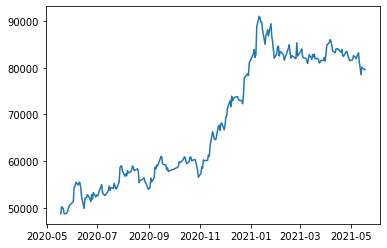

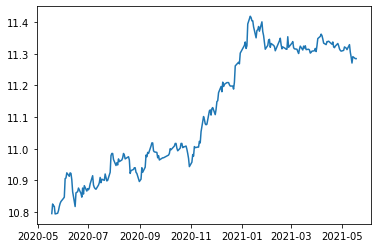

In [5]:
ts[ts.isnull()]
plt.plot(ts)
plt.show()

ts_log = np.log(ts)
plt.plot(ts_log)
plt.show()

# Stationary Data 검정

In [19]:
#한글폰트 추가
plt.rc('font',family='NanumGothic')

# 정성적 분석법

In [32]:
def plot_rolling_test(ts, window):
    rolling_mean = ts.rolling(window=window).mean()
    rolling_std = ts.rolling(window=window).std()
    
    plt.plot(ts, color="blue", label="주가")
    plt.plot(rolling_mean, color="red", label="{}합의 평균".format(window))
    plt.plot(rolling_std, color="green", label="{}합의 표준편차".format(window))
    plt.legend(loc="best")
    plt.title("{}일치 합의 평균/편차 그래프".format(window))
    plt.show()

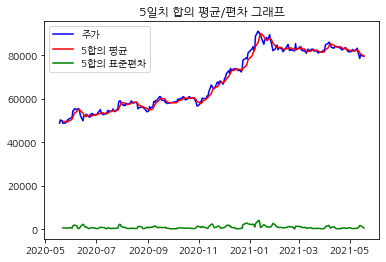

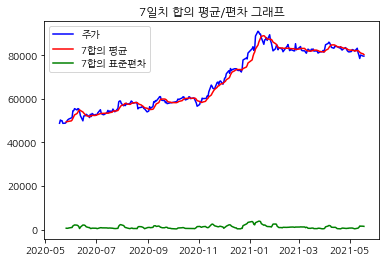

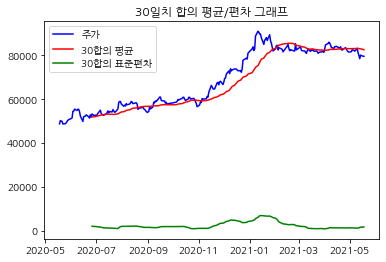

In [35]:
plot_rolling_test(ts, 5)
plot_rolling_test(ts, 7)
plot_rolling_test(ts, 30)

# 정량적 분석법

In [37]:
def station_test(ts):
    test_set = adfuller(ts, autolag="AIC")
    print(test_set)
    print()
    print("=====================================")
    print("Test Staticd = {}".format(test_set[0]))
    print("p_value = {}".format(test_set[1]))
    print("Lags Used = {}".format(test_set[2]))
    print("Number of Obsevations Used : {}".format(test_set[3]))
    print("=====================================")

In [112]:
station_test(ts)

(-1.2226490337221707, 0.6637775813085351, 0, 249, {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}, 3966.2330953070996)

Test Staticd = -1.2226490337221707
p_value = 0.6637775813085351
Lags Used = 0
Number of Obsevations Used : 249


# 시계열 분해


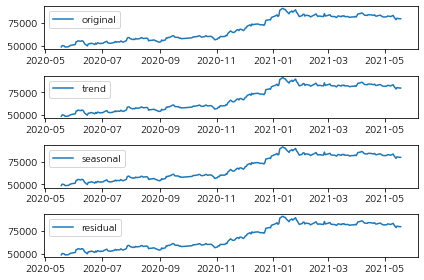

In [126]:
decomposit = seasonal_decompose(ts, period=10)

trend = decomposit.trend
seasonal = decomposit.seasonal
residual = decomposit.resid

lt = ["original", "trend", "seasonal", "residual"]
for i in range(411, 415):
    plt.subplot(i)
    plt.plot(ts, label="{}".format(lt[i-411]))
    plt.legend(loc="best")
    plt.tight_layout()
plt.show()

# Residual stationay 검정

In [129]:
print(residual)

residual.dropna(inplace=True)
station_test(residual)

Date
2020-05-25   -1053.020833
2020-05-26    -757.604167
2020-05-27    -173.229167
2020-05-28    -120.000000
2020-05-29    -290.625000
                 ...     
2021-05-04     790.208333
2021-05-06     649.375000
2021-05-07     158.229167
2021-05-10    1640.312500
2021-05-11     186.354167
Name: resid, Length: 240, dtype: float64
(-9.712980441225397, 1.0000699216600264e-16, 4, 235, {'1%': -3.4584868856997004, '5%': -2.873918902362675, '10%': -2.573367247623359}, 3678.2790472670704)

Test Staticd = -9.712980441225397
p_value = 1.0000699216600264e-16
Lags Used = 4
Number of Obsevations Used : 235


# ARIMA 파라미터 설정

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


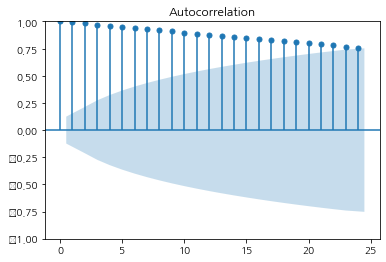

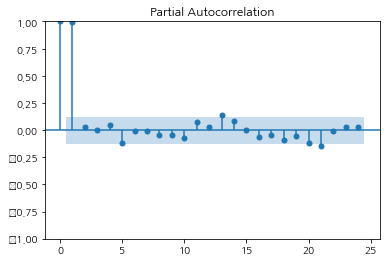

In [133]:
#p와 q 선정 (p >= 1, q = ?)
plot_acf(ts)
plot_pacf(ts)
plt.show()

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


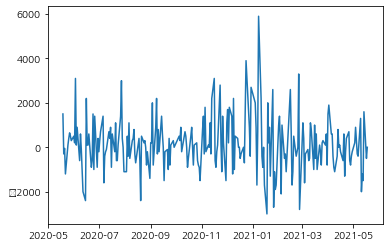

(-15.410589743692016, 3.127307349410298e-28, 0, 248, {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}, 3950.903305352826)

Test Staticd = -15.410589743692016
p_value = 3.127307349410298e-28
Lags Used = 0
Number of Obsevations Used : 248


In [144]:
#d선정 (d = 1)
diff1 = ts.diff(periods=1).iloc[1:]
plt.plot(diff1)
plt.show()
station_test(diff1)

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


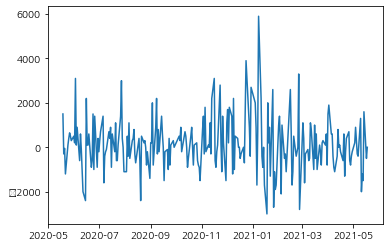

(-10.737689308194417, 2.8708992657202553e-19, 7, 240, {'1%': -3.4578942529658563, '5%': -2.8736593200231484, '10%': -2.573228767361111}, 3955.961759209321)

Test Staticd = -10.737689308194417
p_value = 2.8708992657202553e-19
Lags Used = 7
Number of Obsevations Used : 240


In [143]:
diff2 = diff1.diff(periods=1).iloc[1:]
plt.plot(diff1)
plt.show()
station_test(diff2)

# 데이터셋 분리

In [145]:
print(len(ts))

250


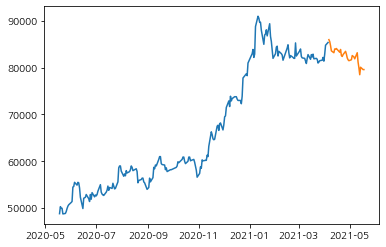

In [180]:
train_size = 220
train = ts[:train_size]
test = ts[train_size:]

plt.plot(train)
plt.plot(test)
plt.show()

# ARIMA 모델 

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  220
Model:                ARIMA(18, 0, 0)   Log Likelihood               -1871.663
Date:                Fri, 16 Dec 2022   AIC                           3783.326
Time:                        08:09:07   BIC                           3851.199
Sample:                             0   HQIC                          3810.735
                                - 220                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.628e+04   1.35e+04      4.893      0.000    3.97e+04    9.28e+04
ar.L1          1.0239      0.068     15.092      0.000       0.891       1.157
ar.L2         -0.0668      0.112     -0.595      0.5

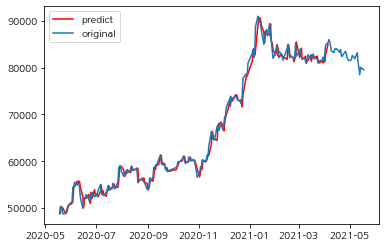

In [261]:
model = ARIMA(train, order=(18, 0, 0))
fitted_model = model.fit()
print(fitted_model.summary())

fitted_model = fitted_model.predict()
fitted_model = fitted_model.drop(fitted_model.index[0])

plt.plot(fitted_model, label='predict', color="red")
plt.plot(ts, label='original')
plt.legend()

# 예측 데이터 시각화


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


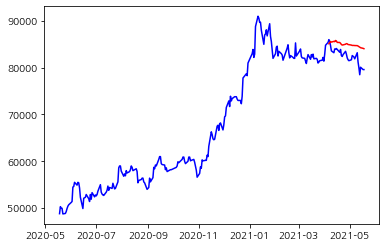

In [262]:
fitted_model = model.fit()
predict = fitted_model.forecast(len(test))
predictions = pd.Series(predict.values, index=test.index)

plt.plot(ts, label="original", color="blue")
plt.plot(predictions, label="prediction", color="red")
plt.show()

# 오차률(MAPE) 검산

In [263]:
mape = np.mean(np.abs(predictions - test)/np.abs(test))
print('MAPE: {:.2f}%'.format(mape*100))

MAPE: 3.09%
